## Gradiente Descendente

--------------------------------------------------------------------------------------------------------------------------------------

In [3]:
def soma_quadrados(lista: list) -> float:
    """Computa a soma dos quadrados dos
    elementos de uma lista"""
    return sum([i*i for i in lista])

In [ ]:
# Estimando gradiente
from typing import Callable, List
Vector = List[float]

def quociente_diferencial(f: Callable[[float], float], x: float, h: float) -> float:
    return (f(x + h) - f(x)) / h

def quadrado(x: float) -> float:
    return x * x

def derivada(x: float) -> float:
    return 2 * x

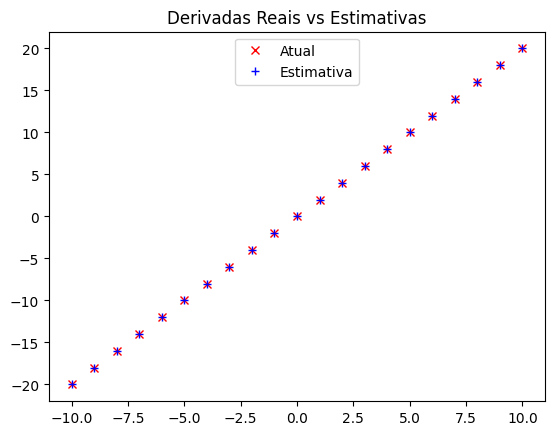

In [7]:
# Resultado da estimativa

xs = range(-10, 11)
atual = [derivada(x) for x in xs]
estimativa = [quociente_diferencial(quadrado, x, h=0.001) for x in xs]

# plotagem
import matplotlib.pyplot as plt
plt.plot(xs, atual, 'rx', label="Atual") 
plt.plot(xs, estimativa, 'b+', label="Estimativa")
plt.title("Derivadas Reais vs Estimativas")
plt.legend(loc=9)
plt.show()

In [ ]:
def quociente_diferencial_parcial(f: Callable[[Vector], float], v: Vector, i: int, h: float) -> float:
    """Retorna o quociente parcial das diferenças i e f em v"""
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

def estimativa_gradiente(f: Callable[[Vector], float], v: Vector, h: float = 0.0001):
    return [quociente_diferencial_parcial(f, v, i, h) for i in range(len(v))]

Conferindo que a função soma_quadrados expressa o mínimo quando a sua entrada é zero.

In [15]:
# funções do notebook de algebra linear
def add(v: Vector, w: Vector) -> Vector:
    """Soma os elementos correspondentes"""
    assert len(v) == len(w), 'Os vetores devem ser do mesmo tamanho'
    return [v_i + w_i for v_i, w_i in zip(v, w)]

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplica um vetor por um escalar"""
    return [c * v_i for v_i in v]

def dot(v: Vector, w: Vector) -> float:
    """Calcula o produto de dois vetores, v_1 * w_1 + v_2 * w_2..."""
    assert len(v) == len(w), 'as funções não têm o mesmo tamanho'

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v: Vector) -> float:
    """Calcula a soma dos quadrados dos vetores"""
    return dot(v, v)

def magnitude(v: Vector) -> float:
    """Calcula a magnitude (comprimento) de um vetor"""
    return sum_of_squares(v)**(1/2)

def subtract(v: Vector, w: Vector) -> Vector:
    """Soma os elementos correspondentes"""
    assert len(v) == len(w), 'Os vetores devem ser do mesmo tamanho'
    return [v_i - w_i for v_i, w_i in zip(v, w)]

def distance(v: Vector, w: Vector) -> float:
    """Calcula a distância entre dois vetores"""
    return magnitude(subtract(v, w))

def vector_sum(vectors: List[Vector]) -> Vector:
    """Soma de mais de dois vetores"""
    assert vectors, "nenhum vetor foi fornecido"

    num_elements =len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "os vetores têm tamanhos diferentes"

    return [sum(vector[i] for vector in vectors ) for i in range(num_elements)]

def vector_mean(v: List[Vector]) -> Vector:
    """Calcula a média dos vetores dados"""
    n = len(v)
    return scalar_multiply(1/n, vector_sum(v))

In [ ]:
import random

def passo_gradiente(v: Vector, gradiente: Vector, tamanho_passo: float) -> Vector:
    """Move um 'tamanho_passo' na direção do gradiente a partir de v"""
    assert len(v) == len(gradiente)
    passo = scalar_multiply(tamanho_passo, gradiente)
    return add(v, passo)

def soma_quadrados_gradiente(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# Selecionando um ponto de partida aleatório
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = soma_quadrados_gradiente(v) # compute o gradiente em v
    v = (passo_gradiente(v, grad, -0.01)) # dê um passo negativo para o gradiente
    #print(epoch, v)

assert distance(v, [0,0,0]) < 0.001 # v deve ser próximo de 0
print(distance(v, [0,0,0]))

1.6318559945466994e-08


In [ ]:
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

def gradiente_linear(x: float, y: float, theta: Vector) -> Vector:
    slop, intercept = theta
    predicted = slop * x + intercept # previsão do modelo
    error = (predicted - y) # o erro é (previsto - real)
    squared_error = error ** 2 # Minimizando o erro quadrático
    grad_1 = [2 * error * x, 2 * error] # usando seu gradiente
    return grad_1

In [ ]:
# Começando com valores aleatórios para a inclinação e o intercepto
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
    # Computando a média dos gradientes
    grad_2 = vector_mean([gradiente_linear(x, y, theta) for x, y in inputs])
    # Dando um passo nessa direção
    theta = passo_gradiente(theta, grad_2, -learning_rate)
    # print(epoch, theta)

print(theta) # Tem que ser algo próximo de 20 e 5 

[19.999999862438507, 4.999770960031621]


Minibatch e gradiente descendente

In [36]:
from typing import TypeVar, List, Iterator

T = TypeVar("T") # Isso permite a inserção de funções genéricas

def minibatches(dataset: List[T], batch_size: int, shuffle: bool = True) -> Iterator[List[T]]:
    """Gera minibatches de tamanho 'batch_size' a partir do conjunto de dados"""
    # inicie os índices 0, batch_size, 2 * batch_soze, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts) # Classificando os batches aleatoriamente

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [52]:
# Usando minibatches para ajustar os modelos

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad_m = vector_mean([gradiente_linear(x, y, theta) for x, y in batch])
        theta = passo_gradiente(theta, grad_m, -learning_rate)

print(theta)

[19.99999999860942, 4.999999291329305]


In [54]:
# Gradiente descendente estocástico

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
for epoch in range(10):
    for x, y in inputs:
        grad_e = gradiente_linear(x, y, theta)
        theta = passo_gradiente(theta, grad_e, -learning_rate)

print(theta)

[20.06079708627012, 1.9739814939727012]
